# Fram the problem 
* the objective of the project is to create a model that predicts the lithology of the logged well from well logging data.
* this solution will eliminate the human errors in interpretations, time, cost and efforts.
* the current solution is done by engineers interpretation and some softwares that may be not easy to use.
* this problem will be supervised / offline / classification.
* the performance will be measured by confusion matrix and classification report.
* the accuracy have to be high to be accepted.
* NOTE: the data was collected through 118 wells from Nurwegian North sea.

# Well logs abbreviation description
* Log Name 	                        Log Description
* FORCE_2020_LITHOFACIES_CONFIDENCE	Qualitiative measure of interpretation confidence
* FORCE_2020_LITHOFACIES_LITHOLOGY	Interpreted Lithofacies
* RDEP	Deep Reading Restitivity measurement
* RSHA	Shallow Reading Restitivity measurement
* RMED	Medium Deep Reading Restitivity measurement
* RXO	Flushed Zone Resistivity measurment
* RMIC	Micro Resisitivity measurment
* SP	Self Potential Log
* DTS	Shear wave sonic log (us/ft)
* DTC	Compressional waves sonic log (us(ft)
* NPHI	Neutron Porosity log
* PEF	Photo Electric Factor log
* GR	Gramma Ray Log
* RHOB	Bulk Density Log
* DRHO	Density Correction log
* CALI	Caliper log
* BS	Borehole Size
* DCAL	Differential Caliper log
* ROPA	Average Rate of Penetration
* SGR	Spectra Gamma Ray log
* MUDWEIGHT	Wheight of Drilling Mud
* ROP	Rate of Penetration
* DEPTH_MD	Measured Depth
* x_loc	X location of sample
* y_loc	Y location of sample
* z_loc	Z (TVDSS) Depth of sample

# Import lib

In [93]:
# libs for reading LAS files extention and converting them to DataFrame
import lasio
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from skmultilearn.model_selection import iterative_train_test_split
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import classification_report,confusion_matrix,make_scorer,f1_score,multilabel_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression

# sklearn_algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Get the Data

In [94]:
las_files_list = []
path = "E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\"

In [95]:
files = os.listdir(path)
files

['15_9-13.las',
 '15_9-14.las',
 '15_9-15.las',
 '15_9-17.las',
 '15_9-23.las',
 '16_1-2.las',
 '16_1-6 A.las',
 '16_10-1.las',
 '16_10-2.las',
 '16_10-3.las',
 '16_10-5.las',
 '16_11-1 ST3.las',
 '16_2-11 A.las',
 '16_2-16.las',
 '16_2-6.las',
 '16_2-7.las',
 '16_4-1.las',
 '16_5-3.las',
 '16_7-4.las',
 '16_7-5.las',
 '16_7-6.las',
 '16_8-1.las',
 '17_11-1.las',
 '17_4-1.las',
 '25_10-10.las',
 '25_10-9.las',
 '25_11-15.las',
 '25_11-19 S.las',
 '25_11-24.las',
 '25_11-5.las',
 '25_2-13 T4.las',
 '25_2-14.las',
 '25_2-7.las',
 '25_3-1.las',
 '25_4-5.las',
 '25_5-1.las',
 '25_5-3.las',
 '25_5-4.las',
 '25_6-1.las',
 '25_6-2.las',
 '25_6-3.las',
 '25_7-2.las',
 '25_8-5 S.las',
 '25_8-7.las',
 '25_9-1.las',
 '26_4-1.las',
 '29_3-1.las',
 '29_6-1.las',
 '30_3-3.las',
 '30_3-5 S.las',
 '30_6-5.las',
 '31_2-1.las',
 '31_2-10.las',
 '31_2-19 S.las',
 '31_2-21 S.las',
 '31_2-7.las',
 '31_2-8.las',
 '31_2-9.las',
 '31_3-1.las',
 '31_3-2.las',
 '31_3-3.las',
 '31_3-4.las',
 '31_4-10.las',
 '31_

In [96]:
for file in files :
    if file.lower().endswith('.las'):
        las_files_list.append(path+file)
        
las_files_list

['E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\15_9-13.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\15_9-14.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\15_9-15.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\15_9-17.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\15_9-23.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\16_1-2.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\16_1-6 A.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\16_10-1.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\16_10-2.las',
 'E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\16_10-3.las',
 'E:\\faculty\\بترول

In [97]:
df_list = []
for lasfile in las_files_list:
    las = lasio.read(lasfile)
    lasdf = las.df()
    lasdf['WELL'] = las.well.WELL.value
    lasdf['DEPTH'] = lasdf.index
    df_list.append(lasdf)

In [98]:
data = pd.concat(df_list,sort = True)
data

,BS,CALI,DCAL,DEPTH,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,...,ROP,ROPA,RSHA,RXO,SGR,SP,WELL,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,,
25.0000,NaN,NaN,NaN,25.0000,NaN,NaN,206.224609,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15/9-13 Sleipner East Appr,NaN,NaN,NaN
25.1520,NaN,NaN,NaN,25.1520,NaN,NaN,206.224625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15/9-13 Sleipner East Appr,NaN,NaN,NaN
25.3040,NaN,NaN,NaN,25.3040,NaN,NaN,206.224655,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15/9-13 Sleipner East Appr,NaN,NaN,NaN
25.4560,NaN,NaN,NaN,25.4560,NaN,NaN,206.224670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15/9-13 Sleipner East Appr,NaN,NaN,NaN
25.6080,NaN,NaN,NaN,25.6080,NaN,NaN,206.224701,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15/9-13 Sleipner East Appr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174.3284,NaN,NaN,NaN,3174.3284,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.651161,NaN,NaN,NaN,NaN,7/1-2 S,NaN,NaN,NaN
3174.4804,NaN,NaN,NaN,3174.4804,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.290388,NaN,NaN,NaN,NaN,7/1-2 S,NaN,NaN,NaN
3174.6324,NaN,NaN,NaN,3174.6324,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.929430,NaN,NaN,NaN,NaN,7/1-2 S,NaN,NaN,NaN


In [99]:
data.columns

Index(['BS', 'CALI', 'DCAL', 'DEPTH', 'DEPTH_MD', 'DRHO', 'DTC', 'DTS',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'GR', 'MUDWEIGHT', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'RMIC', 'ROP',
       'ROPA', 'RSHA', 'RXO', 'SGR', 'SP', 'WELL', 'X_LOC', 'Y_LOC', 'Z_LOC'],
      dtype='object')

In [100]:
# sample a test set
train,test_ = train_test_split(data , test_size= 0.15, random_state = 1000)

In [101]:
train.FORCE_2020_LITHOFACIES_LITHOLOGY.value_counts()

65000.0    745367
30000.0    176683
65030.0    153906
70000.0     59069
80000.0     34944
99000.0     14777
88000.0     12553
70032.0     11944
90000.0      4054
74000.0      2028
86000.0      1536
93000.0       120
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [102]:
test.FORCE_2020_LITHOFACIES_LITHOLOGY.value_counts()

65000.0    45896
30000.0    12182
65030.0     7203
70000.0     5927
80000.0     2757
70032.0     1033
99000.0      641
90000.0      369
86000.0       98
74000.0       84
93000.0       13
88000.0        1
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

###### The data is very imbalanced, so we should split it in more representative way

<AxesSubplot:>

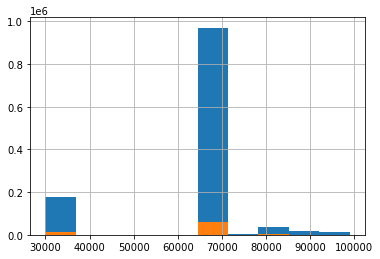

In [103]:
train.FORCE_2020_LITHOFACIES_LITHOLOGY.hist()
test.FORCE_2020_LITHOFACIES_LITHOLOGY.hist()

# Explore the Data

In [104]:
train_data = train.copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1986993 entries, 3713.8492 to 1302.1483926
Data columns (total 28 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   BS                                 float64
 1   CALI                               float64
 2   DCAL                               float64
 3   DEPTH                              float64
 4   DEPTH_MD                           float64
 5   DRHO                               float64
 6   DTC                                float64
 7   DTS                                float64
 8   FORCE_2020_LITHOFACIES_CONFIDENCE  float64
 9   FORCE_2020_LITHOFACIES_LITHOLOGY   float64
 10  GR                                 float64
 11  MUDWEIGHT                          float64
 12  NPHI                               float64
 13  PEF                                float64
 14  RDEP                               float64
 15  RHOB                               float64
 16  RME

In [105]:
train_data.head(10)

,BS,CALI,DCAL,DEPTH,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,...,ROP,ROPA,RSHA,RXO,SGR,SP,WELL,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,,
3713.849200,12.250001,12.290718,NaN,3713.849200,3713.849121,-0.002425,92.857468,181.774017,1.0,65000.0,...,17.612907,17.581860,NaN,NaN,NaN,NaN,33/6-3 S,445083.25000,6829420.0,-3472.106934
2941.760000,12.250001,12.470242,0.220241,2941.760000,2941.760010,0.033557,119.125420,239.755310,1.0,65000.0,...,108.683426,96.526398,NaN,NaN,NaN,NaN,15/9-23 Skardkollen,433926.40625,6459983.0,-2916.429443
1080.433001,NaN,NaN,NaN,1080.433001,1080.432983,NaN,143.354996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.347656,29/6-1,444585.68750,6711938.0,-1055.352783
4943.729976,8.500000,8.503195,NaN,4943.729976,4943.729981,0.022772,78.534599,146.025848,1.0,65030.0,...,26.033857,17.840639,NaN,NaN,NaN,NaN,34/3-3 A,486179.28125,6853273.5,-3901.166748
383.264000,NaN,NaN,NaN,383.264000,383.264008,NaN,178.837906,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-51.681606,31/2-10,526908.12500,6740118.5,-358.262909
1646.801200,17.500000,NaN,NaN,1646.801200,1646.801148,NaN,162.354172,NaN,NaN,NaN,...,28.705513,24.941389,NaN,NaN,NaN,NaN,33/6-3 S,444414.06250,6829572.0,-1617.775146
723.482467,23.999998,NaN,NaN,723.482467,723.482483,NaN,NaN,NaN,NaN,NaN,...,276.702759,0.865624,NaN,NaN,NaN,NaN,34/4-10 R,450954.50000,6833022.5,-699.331482
208.561001,NaN,NaN,NaN,208.561001,208.561005,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.164045,29/6-1,444581.50000,6711946.5,-183.561005
1670.688358,12.250001,12.544044,0.294043,1670.688358,1670.688355,-0.000991,NaN,NaN,2.0,65000.0,...,NaN,NaN,NaN,NaN,NaN,166.975433,35/9-2,550229.56250,6800632.5,-1638.674438


In [106]:
train_data.isna().sum()

BS                                    748671
CALI                                  744043
DCAL                                 1660495
DEPTH                                      0
DEPTH_MD                               98316
DRHO                                  860912
DTC                                   462186
DTS                                  1656420
FORCE_2020_LITHOFACIES_CONFIDENCE     759247
FORCE_2020_LITHOFACIES_LITHOLOGY      770012
GR                                     33921
MUDWEIGHT                            1613310
NPHI                                 1108325
PEF                                  1201345
RDEP                                  100614
RHOB                                  799863
RMED                                  207848
RMIC                                 1784304
ROP                                   949615
ROPA                                 1359209
RSHA                                 1248567
RXO                                  1658534
SGR       

In [107]:
train_data.describe()

,BS,CALI,DCAL,DEPTH,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,...,RMIC,ROP,ROPA,RSHA,RXO,SGR,SP,X_LOC,Y_LOC,Z_LOC
count,1.238322e+06,1.242950e+06,326498.000000,1.986993e+06,1.888677e+06,1.126081e+06,1.524807e+06,330573.000000,1.227746e+06,1.216981e+06,...,202689.000000,1.037378e+06,627784.000000,738426.000000,328459.000000,61323.000000,1.044756e+06,1.888677e+06,1.888677e+06,1.888677e+06
mean,1.377821e+01,1.323310e+01,16.177885,1.876423e+03,1.920525e+03,2.049518e-02,1.167620e+02,221.176120,1.153744e+00,6.142285e+04,...,9.241025,3.278477e+02,36.194235,9.929625,-100.377505,62.638496,4.152931e+01,4.851011e+05,6.691344e+06,-1.873517e+03
std,5.012929e+00,3.714602e+00,391.515721,1.062587e+03,1.043304e+03,7.006588e+00,3.185556e+01,81.472979,4.331777e-01,1.397562e+04,...,107.845403,3.028633e+03,84.987753,96.342683,364.330762,53.448655,1.687321e+02,3.557208e+04,1.356077e+05,1.015130e+03
min,6.000000e+00,2.340806e+00,-23.199656,4.880000e-02,9.880400e+01,-7.429339e+03,0.000000e+00,69.163177,1.000000e+00,3.000000e+04,...,0.056776,-2.149578e+01,-999.250122,0.000100,-999.900024,-983.000000,-4.498991e+03,4.232375e+05,6.406641e+06,-5.435889e+03
25%,9.875000e+00,9.889059e+00,0.099175,1.007369e+03,1.074844e+03,-8.005558e-03,9.060231e+01,160.299698,1.000000e+00,6.500000e+04,...,0.883765,1.108537e+01,15.052276,0.836344,0.665059,42.071171,2.739054e+01,4.544695e+05,6.571042e+06,-2.604147e+03
50%,1.225000e+01,1.256300e+01,0.468308,1.764644e+03,1.807124e+03,3.367372e-03,1.157714e+02,200.132828,1.000000e+00,6.500000e+04,...,1.641856,2.562280e+01,25.761149,1.345224,1.336789,68.718895,5.146843e+01,4.787797e+05,6.758510e+06,-1.771902e+03
75%,1.750000e+01,1.650750e+01,1.185156,2.624288e+03,2.649866e+03,2.530820e-02,1.438644e+02,258.762238,1.000000e+00,6.500000e+04,...,4.113120,4.303925e+01,38.875704,2.610383,3.189610,87.419052,7.665192e+01,5.201532e+05,6.798584e+06,-1.049000e+03
max,4.200000e+01,3.211106e+01,10023.752930,5.479040e+03,5.477672e+03,4.983452e+01,3.204789e+02,724.536194,3.000000e+00,9.900000e+04,...,10000.000000,9.232003e+04,3989.174316,2193.904541,35930.671875,963.608582,5.265473e+02,5.726328e+05,6.856661e+06,-7.265216e+01


<AxesSubplot:>

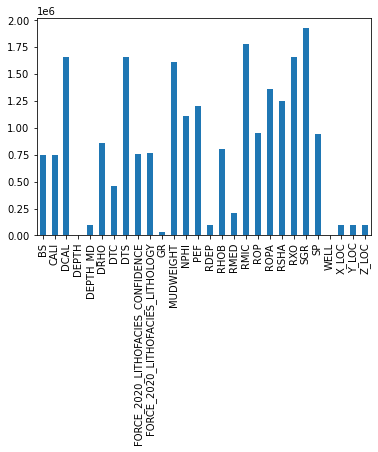

In [108]:
# Visualizing how many null values
data_null = train_data.isna().sum()
data_null.plot.bar()

<AxesSubplot:>

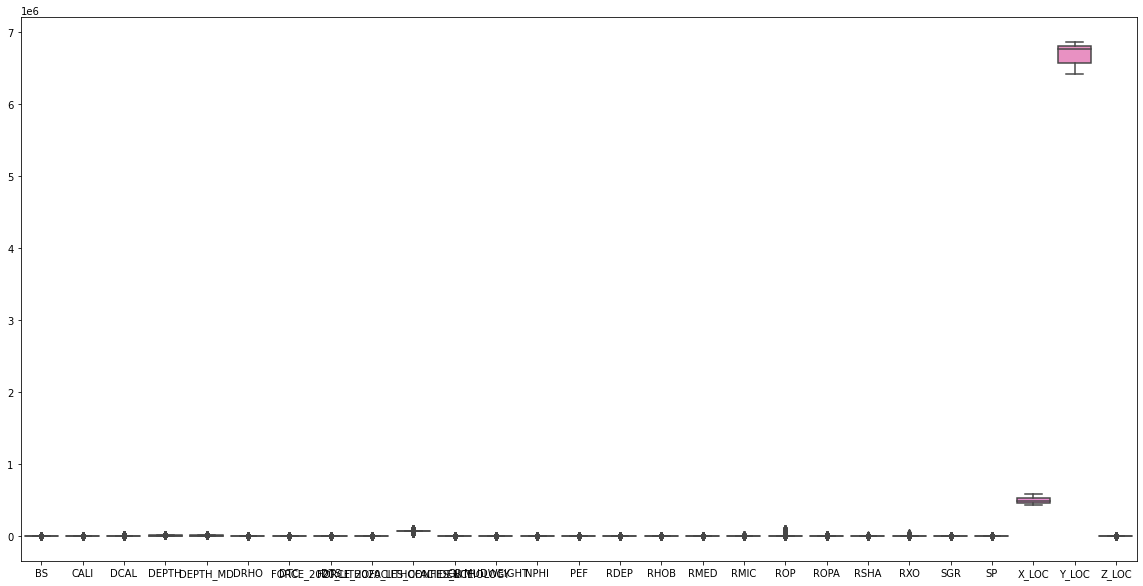

In [109]:
# Noisiness & Outliers check
data_num = train_data.select_dtypes('number')
plt.figure(figsize=(20,10))
sns.boxplot(data=data_num)

C:\Users\gogo2\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\gogo2\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\gogo2\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


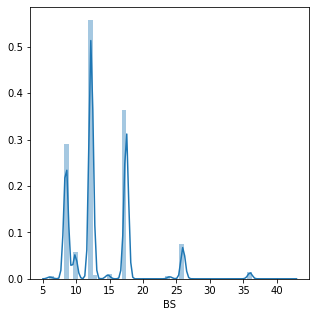

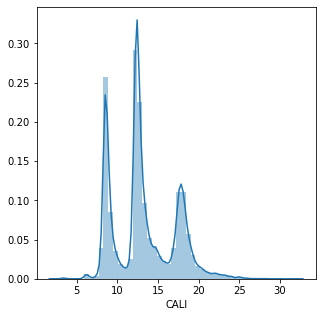

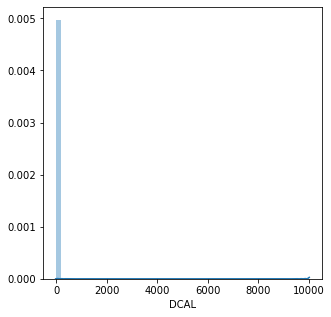

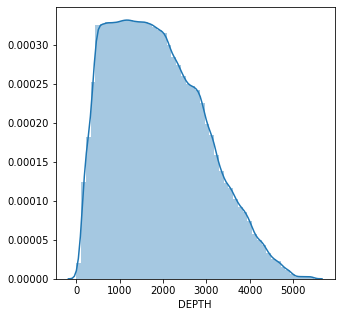

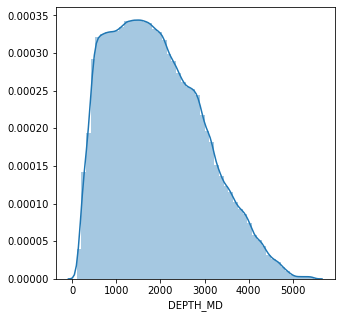

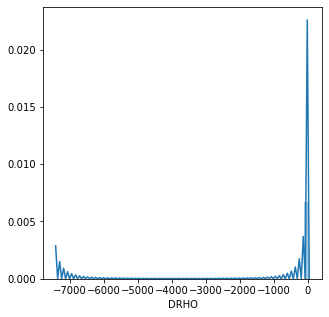

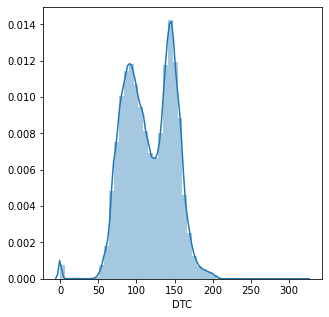

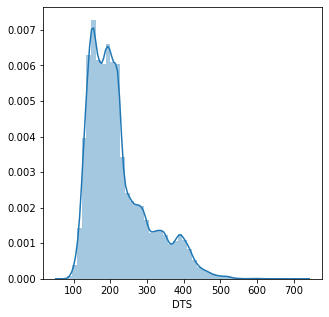

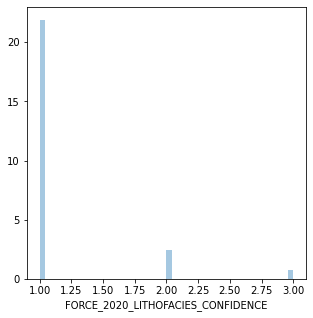

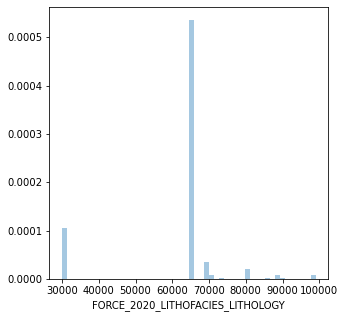

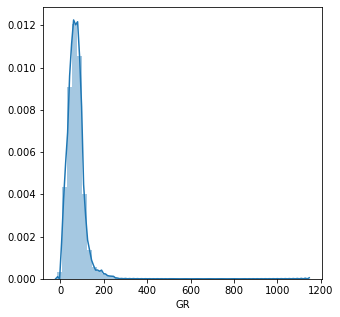

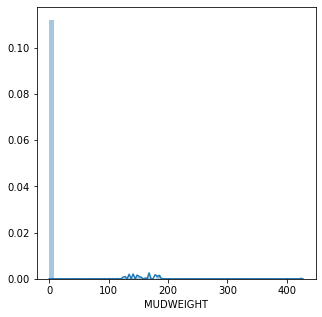

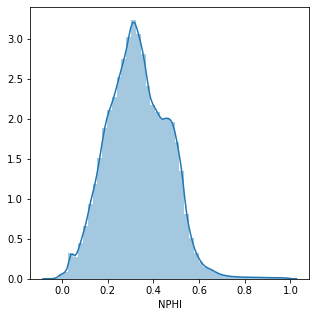

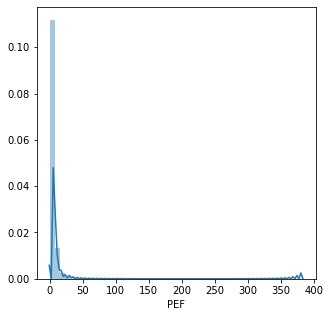

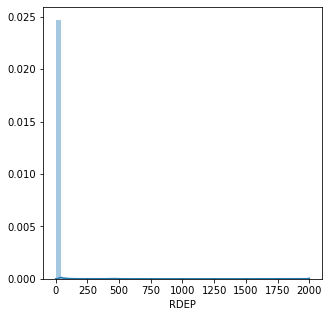

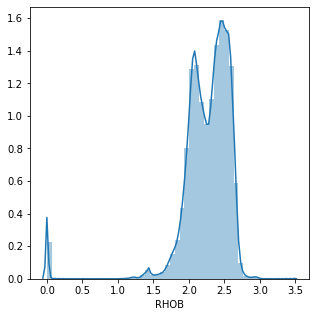

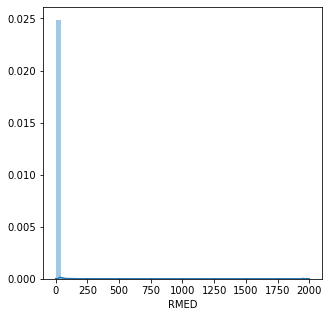

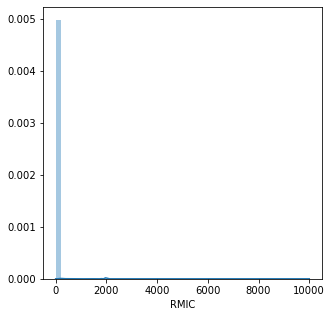

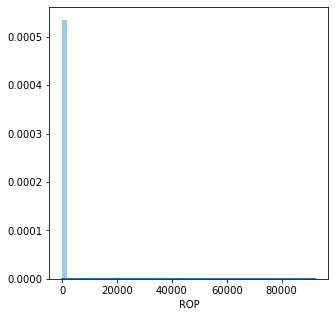

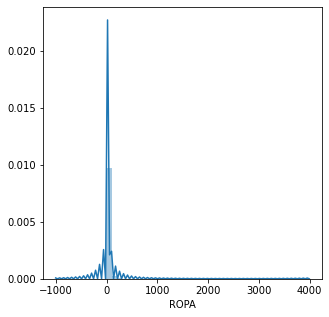

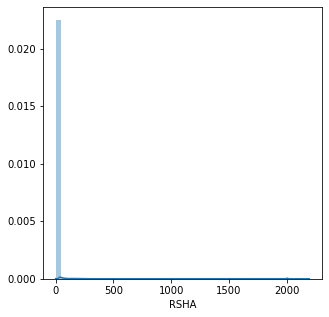

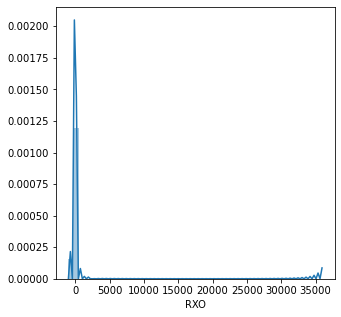

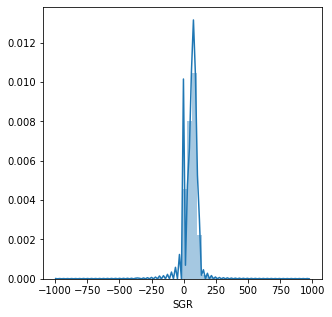

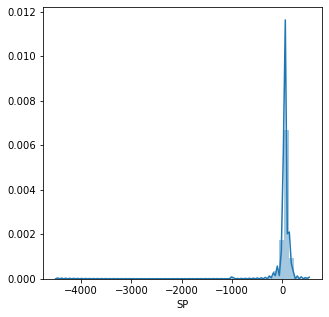

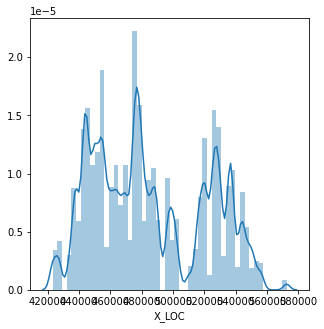

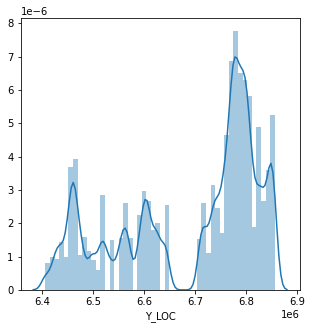

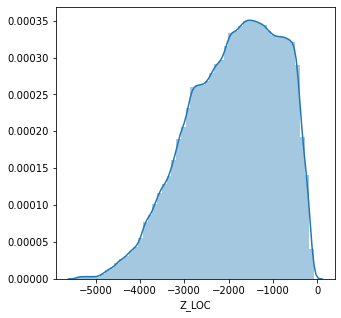

In [110]:
# data distribution:
for col in data_num.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(data_num[col],bins=50,kde = True)



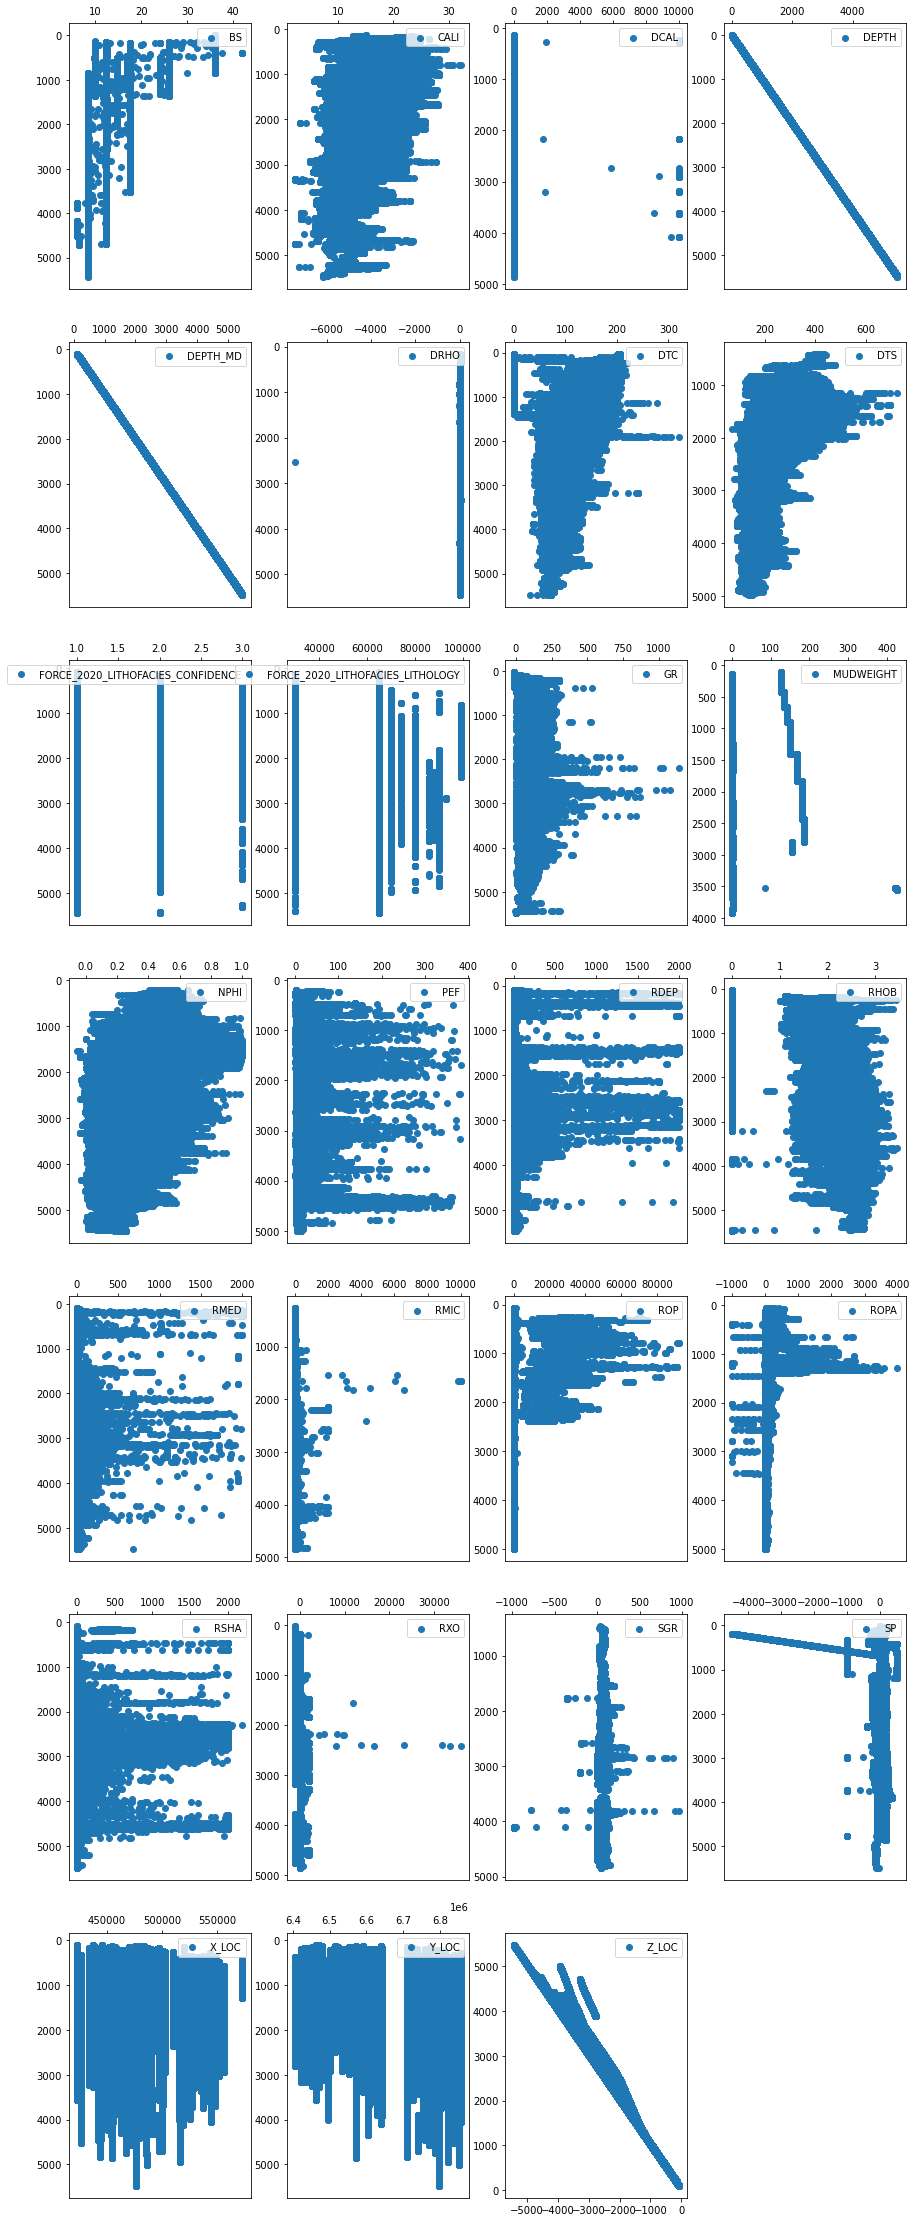

In [111]:
plt.figure(figsize=(15,40))
for i in range(len(data_num.columns)):
    plt.gca().invert_yaxis()
    plt.gca().xaxis.tick_top()
    plt.subplot(7,4,i+1)
    plt.scatter(data_num.iloc[:,i],data_num.DEPTH,label=data_num.iloc[:,i].name)
    plt.legend(loc='upper right')

<AxesSubplot:>

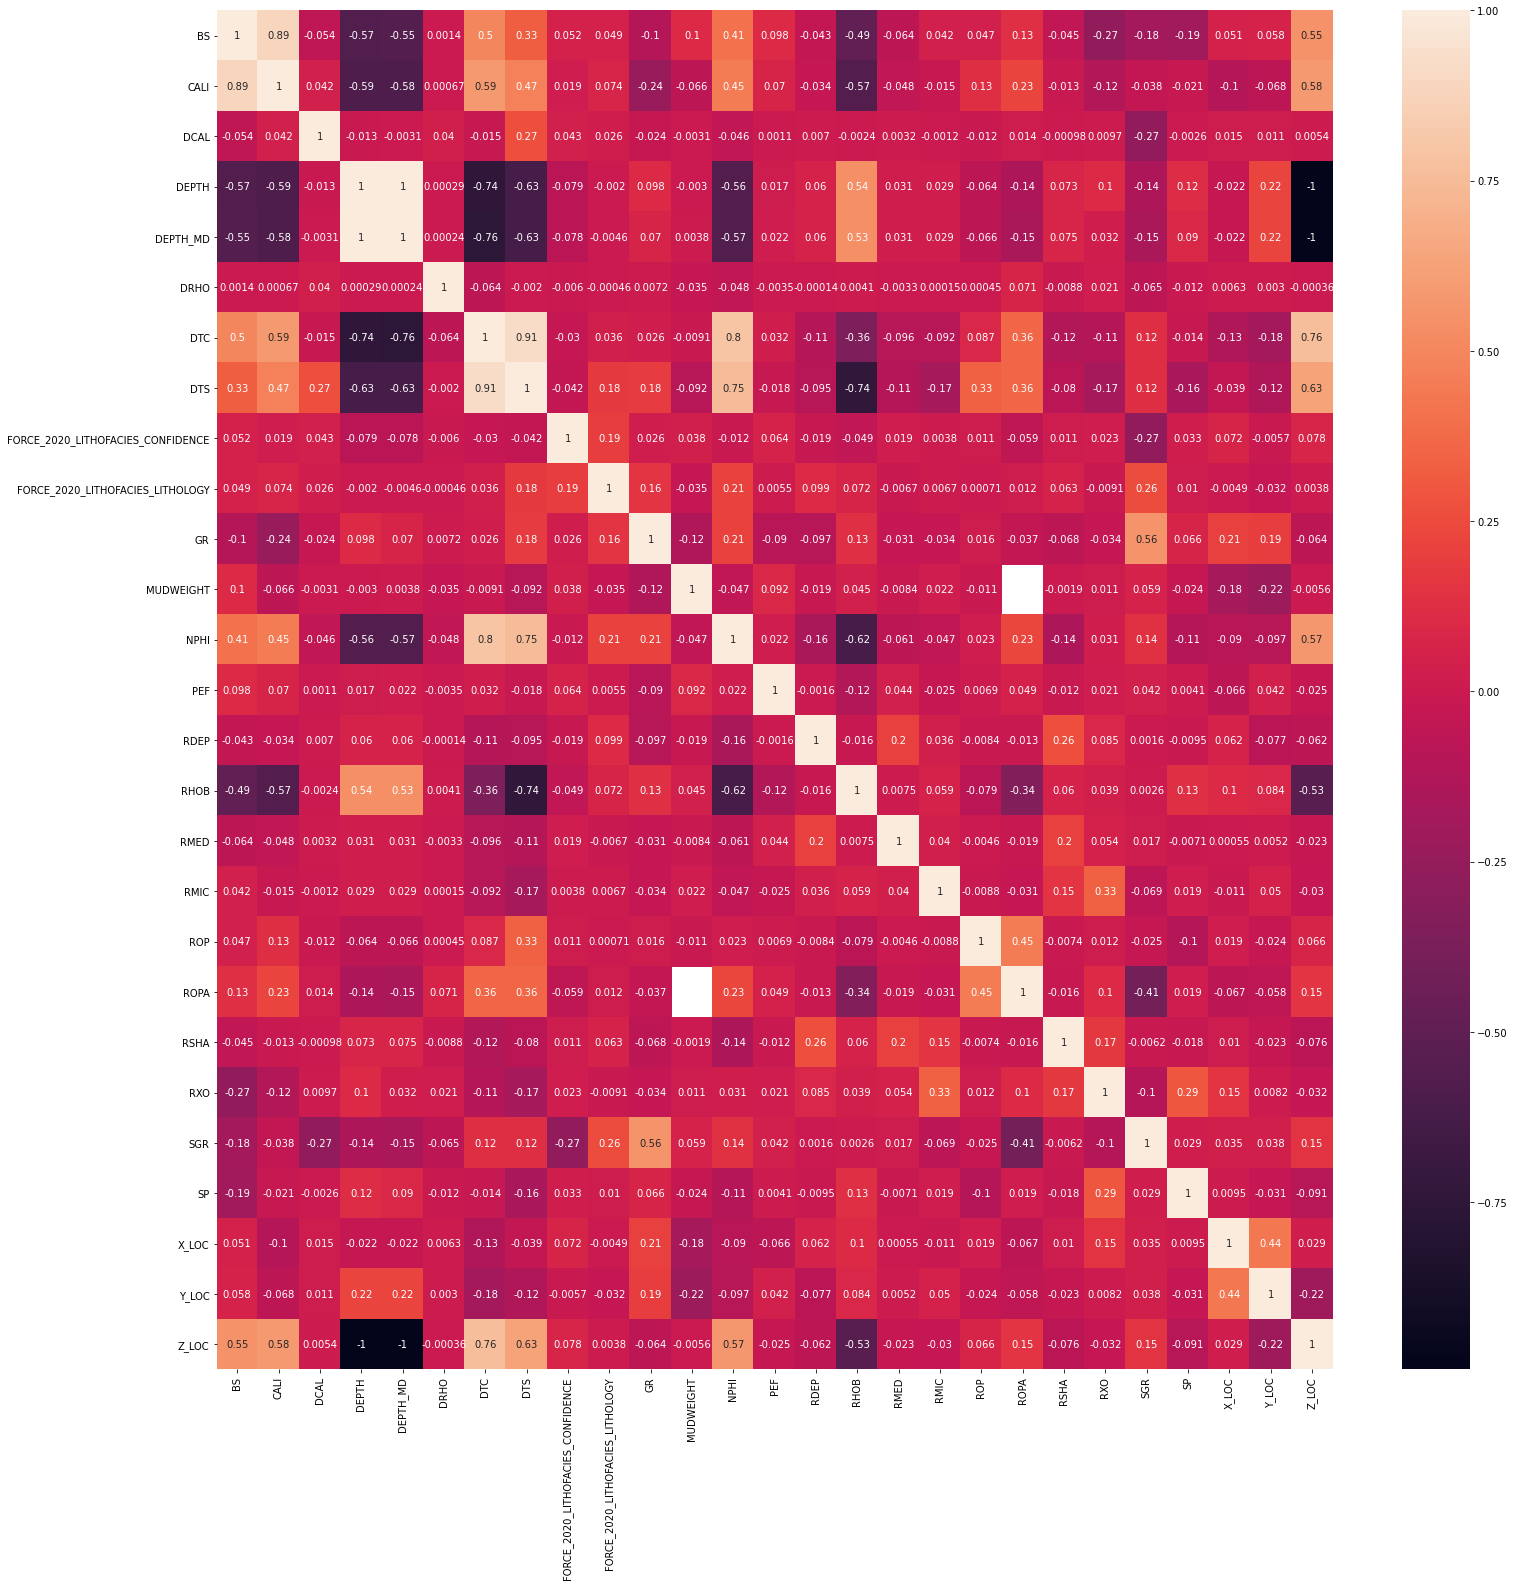

In [112]:
# Feature correlation:
corr = data_num.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)


In [113]:
# Highly correlated features:
def correlation(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
correlation(data_num,0.7)

{'CALI', 'DEPTH_MD', 'DTC', 'DTS', 'NPHI', 'RHOB', 'Z_LOC'}

### Documentation of exploration
* Some features have many null values
* It seems the outliers and noisiness are acceptable
* some Features do not have normal distribution **(DRHO,DTS,GR,PEF,RDEP,RHOB,RMED,RMIC,ROP,ROPA,RSHA,RXO,SP)**
* some features are highly correlated and have to be removed **('CALI', 'DEPTH_MD', 'DTC', 'DTS', 'NPHI', 'RHOB', 'Z_LOC')**

# Prepare the data

## Feature selection

In [114]:
# we have to drop highly correlated features
def drop_corr(data):
    data.drop(['CALI', 'DEPTH_MD', 'DTC', 'DTS', 'NPHI', 'RHOB', 'Z_LOC'],axis=1,inplace=True)
    return data.shape
drop_corr(train_data)

(1986993, 21)

## Data Cleaning:

(431751, 21)

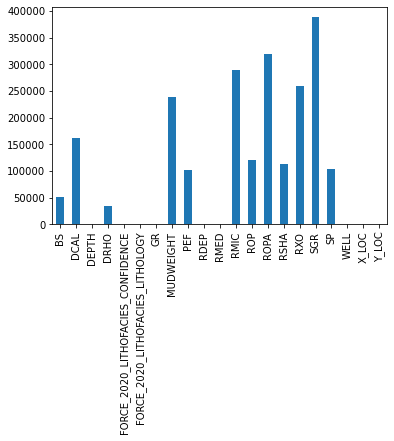

In [115]:
# Missing data
## dropping rows that have at least 28% null values
def dropna(data):
    data.dropna(thresh=15,inplace=True)
    data.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'],inplace=True)
# Visualizing how many null values
    data_null = data.isna().sum()
    data_null.plot.bar()
    return data.shape

dropna(train_data)



(431751, 19)

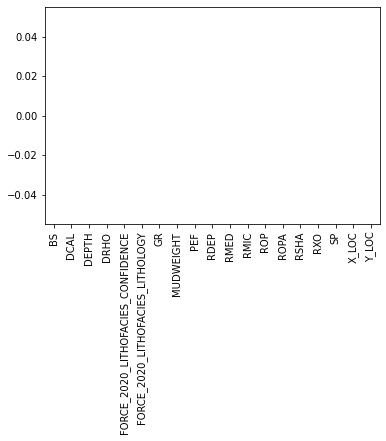

In [116]:
## Fill in missing data
def missing(data):
    global train_data
    data['DCAL'].fillna(0,inplace=True)
    data.drop('SGR',axis=1,inplace=True)
    well = data['WELL']
    data.drop('WELL',axis=1,inplace=True)
    knn = KNNImputer(n_neighbors=1)
    global impute
    impute = IterativeImputer()
    train_array = impute.fit_transform(data)
    data = pd.DataFrame(train_array , columns = data.columns , index = data.index)
# Visualizing how many null values
    data_null = data.isna().sum()
    data_null.plot.bar()
    train_data = data.copy()
    return data.shape

missing(train_data)

In [117]:
train_data

,BS,DCAL,DEPTH,DRHO,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,GR,MUDWEIGHT,PEF,RDEP,RMED,RMIC,ROP,ROPA,RSHA,RXO,SP,X_LOC,Y_LOC
DEPT,,,,,,,,,,,,,,,,,,,
2941.760000,12.250001,0.220241,2941.760000,0.033557,1.0,65000.0,189.254669,5.858415,5.419313,0.930877,0.967339,23.106974,108.683426,96.526398,21.005633,-158.387754,219.163316,433926.40625,6459983.0
2937.720000,12.250001,0.921328,2937.720000,0.053181,1.0,65000.0,58.023640,2.191959,4.650781,2.142491,2.147222,12.482573,83.947951,27.854908,2.157914,-98.539977,94.426918,469357.62500,6628712.5
748.761985,12.250001,0.000000,748.761985,0.000254,1.0,65000.0,65.636505,0.922028,5.005035,3.339014,2.461389,21.321578,1014.850360,42.087944,3.531391,-327.526488,15.328981,438474.96875,6814188.0
825.521985,12.250001,0.000000,825.521985,0.011643,1.0,65000.0,71.343170,0.779543,4.321421,2.805312,2.348825,22.222619,848.830271,50.614101,2.971397,-347.577699,15.940998,438474.28125,6814187.0
2044.848000,17.500000,0.000000,2044.848000,0.006073,1.0,65000.0,101.534981,0.161766,24.113934,0.878739,0.893399,1.853164,16731.652344,-2.338865,1.127460,1.859613,0.246189,489826.93750,6602680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422.198815,17.500000,0.000000,1422.198815,-0.011719,1.0,65000.0,82.577530,-10.308783,3.971670,1.960229,1.358924,1.850945,404.792107,7.435040,2.313298,2.286861,181.686508,551764.62500,6783875.5
1118.468002,12.250001,1.768328,1118.468002,0.067359,1.0,65000.0,127.103752,-0.016655,7.216981,1.144325,1.075554,-10.559337,6.929111,6.163682,-5.567935,-108.517809,75.636979,480018.40625,6515758.0
3505.440000,8.500000,0.166930,3505.440000,0.050674,1.0,65000.0,90.510948,3.671780,3.871829,5.613405,5.543041,19.795598,86.175716,38.886467,6.357938,8.582816,222.435898,469362.18750,6628701.0


## Feature engineering

* Add promising transformation of features:**(DRHO,GR,PEF,RDEP,RHOB,RMED,RMIC,ROP,ROPA,RSHA,RXO,SP)**


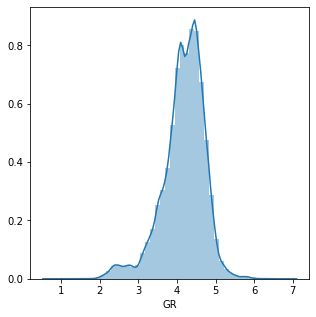

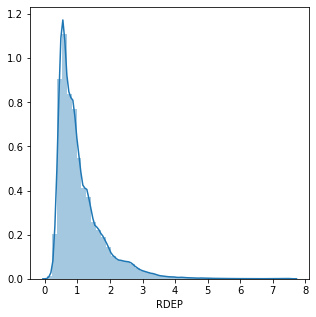

In [118]:
def transformation(data):    
    for col in ['GR','RDEP']:
        data[col] = np.log1p(data[col])
transformation(train_data)
# data distribution:
for col in ['GR','RDEP']:
    plt.figure(figsize=(5,5))
    sns.distplot(train_data[col],bins=50,kde = True)


In [119]:
# SAVE FINAL DATA 
train_data.to_csv('E:\\faculty\\بترول\\datasets\\Force_2020_all_wells_train_test_blind_hidden_final\\Final_data_file.csv')

In [120]:
# Extract X_train & y_train from train_data
y_train = train_data[['FORCE_2020_LITHOFACIES_CONFIDENCE','FORCE_2020_LITHOFACIES_LITHOLOGY']]
train_data.drop(['FORCE_2020_LITHOFACIES_CONFIDENCE','FORCE_2020_LITHOFACIES_LITHOLOGY'],axis = 1, inplace = True)
X_train = train_data.copy()
X_train.shape

(431751, 17)

In [121]:
# Feature scaling is preferred and a promising step for some algorithms
def scaler(data):
    global X_train_std
    global std
    std = StandardScaler()
    X_train_std = std.fit_transform(data)
    X_train_std = pd.DataFrame(X_train_std , columns = data.columns , index = data.index)
    return 
scaler(X_train)

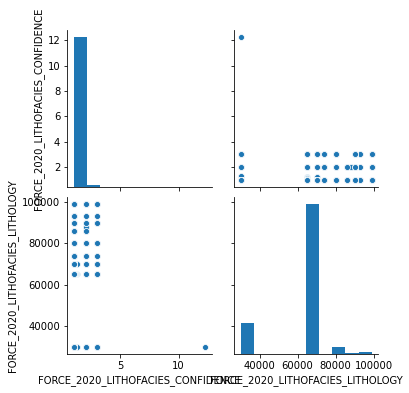

In [122]:
# Study the dependent (TARGET) variables y_train:
sns.pairplot(y_train)

 ##### The LITHOLOGY column
* The LITHOLOGY column contains the interpretation. Each number corresponds to a lithology class, given by the following list:


In [123]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [124]:
y_train['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000.0    259833
30000.0     69677
65030.0     40316
70000.0     33290
80000.0     16263
70032.0      5633
99000.0      3471
90000.0      2058
86000.0       579
74000.0       533
93000.0        79
88000.0        19
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

##### It seems that the dataset is imbalanced 
* we can deal with that using **RandomForest** classifier

## Processing pipeline

In [151]:
def processing_pipeline(data):
    global test
    data.drop(['CALI', 'DEPTH_MD', 'DTC', 'DTS', 'NPHI', 'RHOB', 'Z_LOC'],axis=1,inplace=True)
   
    data.dropna(thresh=15,inplace=True)
    data.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'],inplace=True)
  
    data['DCAL'].fillna(0,inplace=True)
    data.drop('SGR',axis=1,inplace=True)
    well = data['WELL']
    data.drop('WELL',axis=1,inplace=True)
    test_array = impute.fit_transform(data)
    data = pd.DataFrame(test_array , columns = data.columns , index = data.index)
    test = data.copy()
    
    for col in ['GR','RDEP']:
        test[col] = np.log1p(test[col])   
        
    # data splitting for testset only not for new data
    global y_test,X_test
    y_test_all = test[['FORCE_2020_LITHOFACIES_CONFIDENCE','FORCE_2020_LITHOFACIES_LITHOLOGY']]
    y_test = test['FORCE_2020_LITHOFACIES_LITHOLOGY']
    test.drop(['FORCE_2020_LITHOFACIES_CONFIDENCE','FORCE_2020_LITHOFACIES_LITHOLOGY'],axis = 1, inplace = True)
    X_test = test.copy()
    
    global X_test_std
    X_test_std = std.transform(test)
    X_test_std = pd.DataFrame(X_test_std , columns = test.columns , index = test.index)
         
    return X_test


### Documentation of Preparation:
* Drop correlated features **function**
* Dropna **function** 
* Missing **function** with global
* Transformation **function** 
* Extract X_train & y_train from dataset
* Scaler **function** with global
* Processing pipeline **function** for test and new data

# Training Models:


###  1.Logistic Regression Model

In [128]:
y_train_copy = y_train.copy()
y_train = y_train['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [35]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train_std,y_train)
y_pred_logistic = logistic_model.predict(X_train_std)

#### Model Evaluation

In [36]:
def scoring(y_train,y_pred):
    print('The classification Report:\n ', classification_report(y_train,y_pred))
    print('--------------------------------------------')
    print('The Confusion Matrix:\n ', confusion_matrix(y_train,y_pred))
    return f1_score(y_train,y_pred,average='weighted')

scoring(y_train,y_pred_logistic)

The classification Report:
                precision    recall  f1-score   support

     30000.0       0.93      0.96      0.94     69677
     65000.0       0.82      0.97      0.89    259833
     65030.0       0.46      0.10      0.16     40316
     70000.0       0.76      0.72      0.74     33290
     70032.0       0.80      0.59      0.68      5633
     74000.0       0.28      0.02      0.04       533
     80000.0       0.81      0.47      0.59     16263
     86000.0       0.85      0.82      0.83       579
     88000.0       0.38      0.16      0.22        19
     90000.0       0.68      0.18      0.28      2058
     93000.0       0.15      0.05      0.08        79
     99000.0       0.00      0.00      0.00      3471

    accuracy                           0.83    431751
   macro avg       0.58      0.42      0.45    431751
weighted avg       0.79      0.83      0.79    431751

--------------------------------------------
The Confusion Matrix:
  [[ 66567   2386    581    131      

0.7915844760652404

#### Cross validation Score


In [37]:
#logistic_score = cross_val_score(logistic_model,X_train_std,y_train,scoring= make_scorer(scoring), cv=5,n_jobs=-1)


### 2. SVC & LinearSVC Model


In [38]:
# SVC
svc_model = SVC()
svc_model.fit(X_train_std,y_train)
y_pred_scv = svc_model.predict(X_train_std)

# LinearSVC
linearsvc_model = LinearSVC()
linearsvc_model.fit(X_train_std,y_train)
y_pred_linearscv = linearsvc_model.predict(X_train_std)

C:\Users\gogo2\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Model Evaluation

In [39]:
# SVC
scoring(y_train,y_pred_scv)

# LinearSVC
scoring(y_train,y_pred_linearscv)

The classification Report:
                precision    recall  f1-score   support

     30000.0       0.99      1.00      0.99     69677
     65000.0       0.91      0.97      0.94    259833
     65030.0       0.78      0.60      0.68     40316
     70000.0       0.88      0.78      0.83     33290
     70032.0       0.85      0.74      0.79      5633
     74000.0       0.63      0.06      0.12       533
     80000.0       0.92      0.79      0.85     16263
     86000.0       0.92      0.96      0.94       579
     88000.0       1.00      0.37      0.54        19
     90000.0       0.96      0.57      0.71      2058
     93000.0       0.93      0.67      0.78        79
     99000.0       0.96      0.93      0.94      3471

    accuracy                           0.91    431751
   macro avg       0.89      0.70      0.76    431751
weighted avg       0.91      0.91      0.91    431751

--------------------------------------------
The Confusion Matrix:
  [[ 69369    228     31     12      

C:\Users\gogo2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification Report:
                precision    recall  f1-score   support

     30000.0       0.89      0.96      0.92     69677
     65000.0       0.79      0.97      0.87    259833
     65030.0       0.37      0.02      0.03     40316
     70000.0       0.72      0.65      0.68     33290
     70032.0       0.70      0.31      0.43      5633
     74000.0       0.00      0.00      0.00       533
     80000.0       0.67      0.12      0.20     16263
     86000.0       0.76      0.67      0.71       579
     88000.0       0.00      0.00      0.00        19
     90000.0       0.69      0.04      0.08      2058
     93000.0       0.50      0.05      0.09        79
     99000.0       0.00      0.00      0.00      3471

    accuracy                           0.80    431751
   macro avg       0.51      0.32      0.34    431751
weighted avg       0.75      0.80      0.74    431751

--------------------------------------------
The Confusion Matrix:
  [[ 66562   2456    422    223      

0.7447128173561435

####  Cross validation Score


In [40]:
# SVC
svc_score = cross_validate(svc_model,X_train_std,y_train,scoring= make_scorer(scoring), cv=5)
print('==========================================')
# LinearSVC
#linearsvc_score = cross_val_score(linearsvc_model,X_train_std,y_train,scoring= make_scorer(score), cv=5,n_jobs=-1)

C:\Users\gogo2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification Report:
                precision    recall  f1-score   support

     30000.0       0.99      0.99      0.99     13935
     65000.0       0.91      0.98      0.94     51967
     65030.0       0.78      0.58      0.67      8063
     70000.0       0.87      0.76      0.81      6658
     70032.0       0.84      0.72      0.77      1127
     74000.0       0.33      0.01      0.02       107
     80000.0       0.90      0.76      0.83      3253
     86000.0       0.90      0.89      0.90       116
     88000.0       0.00      0.00      0.00         4
     90000.0       0.93      0.52      0.67       411
     93000.0       0.90      0.56      0.69        16
     99000.0       0.96      0.90      0.93       694

    accuracy                           0.91     86351
   macro avg       0.78      0.64      0.68     86351
weighted avg       0.91      0.91      0.90     86351

--------------------------------------------
The Confusion Matrix:
  [[13840    65    17     6     0    

C:\Users\gogo2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification Report:
                precision    recall  f1-score   support

     30000.0       0.99      0.99      0.99     13935
     65000.0       0.91      0.97      0.94     51967
     65030.0       0.77      0.60      0.67      8064
     70000.0       0.87      0.77      0.82      6658
     70032.0       0.85      0.69      0.76      1126
     74000.0       0.25      0.02      0.03       107
     80000.0       0.91      0.78      0.84      3253
     86000.0       0.88      0.92      0.90       115
     88000.0       0.00      0.00      0.00         3
     90000.0       0.96      0.49      0.64       412
     93000.0       0.82      0.56      0.67        16
     99000.0       0.95      0.92      0.93       694

    accuracy                           0.91     86350
   macro avg       0.76      0.64      0.68     86350
weighted avg       0.91      0.91      0.91     86350

--------------------------------------------
The Confusion Matrix:
  [[13851    60     9     2     0    

C:\Users\gogo2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification Report:
                precision    recall  f1-score   support

     30000.0       0.99      0.99      0.99     13935
     65000.0       0.91      0.97      0.94     51967
     65030.0       0.77      0.58      0.66      8063
     70000.0       0.86      0.77      0.81      6658
     70032.0       0.83      0.70      0.76      1126
     74000.0       0.50      0.02      0.04       107
     80000.0       0.90      0.76      0.82      3253
     86000.0       0.86      0.92      0.89       116
     88000.0       0.00      0.00      0.00         4
     90000.0       0.93      0.53      0.68       412
     93000.0       1.00      0.40      0.57        15
     99000.0       0.96      0.90      0.93       694

    accuracy                           0.91     86350
   macro avg       0.79      0.63      0.67     86350
weighted avg       0.90      0.91      0.90     86350

--------------------------------------------
The Confusion Matrix:
  [[13849    65     7     4     0    

C:\Users\gogo2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification Report:
                precision    recall  f1-score   support

     30000.0       0.99      0.99      0.99     13936
     65000.0       0.91      0.97      0.94     51966
     65030.0       0.77      0.58      0.66      8063
     70000.0       0.87      0.77      0.82      6658
     70032.0       0.84      0.71      0.77      1127
     74000.0       0.29      0.02      0.04       106
     80000.0       0.89      0.75      0.82      3252
     86000.0       0.84      0.94      0.89       116
     88000.0       0.00      0.00      0.00         4
     90000.0       0.95      0.51      0.66       411
     93000.0       1.00      0.62      0.77        16
     99000.0       0.95      0.90      0.92       695

    accuracy                           0.91     86350
   macro avg       0.77      0.65      0.69     86350
weighted avg       0.90      0.91      0.90     86350

--------------------------------------------
The Confusion Matrix:
  [[13850    67     3     3     0    

In [41]:
svc_score['test_score']

array([0.90442446, 0.90617129, 0.9032436 , 0.90653135, 0.90310807])

### 3.RandomForestClassifier Model


In [42]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train,y_train)
y_pred_forest = forest_model.predict(X_train)

#### Model Evaluation


In [43]:
scoring(y_train,y_pred_forest)

The classification Report:
                precision    recall  f1-score   support

     30000.0       1.00      1.00      1.00     69677
     65000.0       1.00      1.00      1.00    259833
     65030.0       1.00      1.00      1.00     40316
     70000.0       1.00      1.00      1.00     33290
     70032.0       1.00      1.00      1.00      5633
     74000.0       1.00      1.00      1.00       533
     80000.0       1.00      1.00      1.00     16263
     86000.0       1.00      1.00      1.00       579
     88000.0       1.00      1.00      1.00        19
     90000.0       1.00      1.00      1.00      2058
     93000.0       1.00      1.00      1.00        79
     99000.0       1.00      1.00      1.00      3471

    accuracy                           1.00    431751
   macro avg       1.00      1.00      1.00    431751
weighted avg       1.00      1.00      1.00    431751

--------------------------------------------
The Confusion Matrix:
  [[ 69677      0      0      0      

1.0

#### Cross validation Score


In [44]:
forest_score = cross_val_score(forest_model,X_train,y_train,scoring= make_scorer(scoring), cv=5)

The classification Report:
                precision    recall  f1-score   support

     30000.0       1.00      1.00      1.00     13935
     65000.0       0.98      0.99      0.98     51967
     65030.0       0.94      0.91      0.93      8063
     70000.0       0.98      0.92      0.95      6658
     70032.0       0.96      0.96      0.96      1127
     74000.0       0.96      0.63      0.76       107
     80000.0       0.99      0.97      0.98      3253
     86000.0       0.97      0.97      0.97       116
     88000.0       1.00      1.00      1.00         4
     90000.0       0.99      0.92      0.96       411
     93000.0       1.00      1.00      1.00        16
     99000.0       1.00      0.99      1.00       694

    accuracy                           0.98     86351
   macro avg       0.98      0.94      0.96     86351
weighted avg       0.98      0.98      0.98     86351

--------------------------------------------
The Confusion Matrix:
  [[13888    42     3     1     0    

In [46]:
forest_score

array([0.97702424, 0.97758182, 0.97709102, 0.97701482, 0.97766315])

### 4.KNeighborsClassifier


In [47]:
kn_model = KNeighborsClassifier()
kn_model.fit(X_train_std,y_train)
y_pred_kn = kn_model.predict(X_train_std)

#### Model Evaluation

In [48]:
scoring(y_train,y_pred_kn)

The classification Report:
                precision    recall  f1-score   support

     30000.0       0.99      0.99      0.99     69677
     65000.0       0.97      0.99      0.98    259833
     65030.0       0.92      0.91      0.92     40316
     70000.0       0.96      0.89      0.93     33290
     70032.0       0.94      0.95      0.95      5633
     74000.0       0.84      0.53      0.65       533
     80000.0       0.96      0.94      0.95     16263
     86000.0       0.91      0.95      0.93       579
     88000.0       0.94      0.89      0.92        19
     90000.0       0.96      0.79      0.87      2058
     93000.0       0.97      0.95      0.96        79
     99000.0       0.99      0.98      0.99      3471

    accuracy                           0.97    431751
   macro avg       0.95      0.90      0.92    431751
weighted avg       0.97      0.97      0.97    431751

--------------------------------------------
The Confusion Matrix:
  [[ 69077    407    111     40      

0.9695480776467152

#### Cross validation Score


In [49]:
#kn_score = cross_val_score(kn_model,X_train_std,y_train,scoring= make_scorer(scoring), cv=5)

### 5.GaussianNB


In [50]:
naive_model = GaussianNB()
naive_model.fit(X_train,y_train)
y_pred_naive = naive_model.predict(X_train)

#### Model Evaluation

In [51]:
scoring(y_train,y_pred_naive)

The classification Report:
                precision    recall  f1-score   support

     30000.0       0.45      0.01      0.02     69677
     65000.0       0.66      0.26      0.37    259833
     65030.0       0.17      0.55      0.26     40316
     70000.0       0.07      0.03      0.04     33290
     70032.0       0.08      0.92      0.15      5633
     74000.0       0.04      0.06      0.05       533
     80000.0       0.14      0.00      0.00     16263
     86000.0       0.53      0.78      0.63       579
     88000.0       0.09      1.00      0.16        19
     90000.0       0.07      0.15      0.09      2058
     93000.0       0.48      0.99      0.65        79
     99000.0       0.02      0.70      0.04      3471

    accuracy                           0.23    431751
   macro avg       0.23      0.45      0.21    431751
weighted avg       0.50      0.23      0.26    431751

--------------------------------------------
The Confusion Matrix:
  [[  798 19984 20429  3024  8023   2

0.2592147191263622

#### Cross validation Score


In [52]:
#naive_score = cross_val_score(naive_model,X_train,y_train,scoring= make_scorer(scoring), cv=5)

### 6.Perceptron


In [53]:
perceptron_model = Perceptron()
perceptron_model.fit(X_train_std,y_train)
y_pred_perceptron = perceptron_model.predict(X_train_std)

####  Model Evaluation 

In [54]:
scoring(y_train,y_pred_perceptron)

The classification Report:
                precision    recall  f1-score   support

     30000.0       0.96      0.93      0.94     69677
     65000.0       0.82      0.89      0.85    259833
     65030.0       0.30      0.19      0.23     40316
     70000.0       0.51      0.71      0.59     33290
     70032.0       0.63      0.49      0.55      5633
     74000.0       0.00      0.00      0.00       533
     80000.0       0.72      0.20      0.31     16263
     86000.0       0.89      0.78      0.83       579
     88000.0       0.00      0.00      0.00        19
     90000.0       0.86      0.08      0.14      2058
     93000.0       0.00      0.00      0.00        79
     99000.0       0.03      0.03      0.03      3471

    accuracy                           0.77    431751
   macro avg       0.48      0.36      0.37    431751
weighted avg       0.76      0.77      0.75    431751

--------------------------------------------
The Confusion Matrix:
  [[ 64955   3489    823    317      

0.7542945142888116

#### Cross validation Score


In [55]:
#perceptron_score = cross_val_score(perceptron_model,X_train_std,y_train,scoring= make_scorer(scoring), cv=5)

### 7.SGDClassifier


In [56]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
y_pred_sgd = sgd_model.predict(X_train)

C:\Users\gogo2\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


#### Model Evaluation

In [57]:
scoring(y_train,y_pred_sgd)

C:\Users\gogo2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification Report:
                precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00     69677
     65000.0       0.62      0.90      0.73    259833
     65030.0       0.27      0.25      0.26     40316
     70000.0       0.00      0.00      0.00     33290
     70032.0       0.00      0.00      0.00      5633
     74000.0       0.00      0.00      0.00       533
     80000.0       0.00      0.00      0.00     16263
     86000.0       0.00      0.00      0.00       579
     88000.0       0.00      0.00      0.00        19
     90000.0       0.00      0.00      0.00      2058
     93000.0       0.00      0.00      0.00        79
     99000.0       0.00      0.00      0.00      3471

    accuracy                           0.56    431751
   macro avg       0.07      0.10      0.08    431751
weighted avg       0.40      0.56      0.46    431751

--------------------------------------------
The Confusion Matrix:
  [[     0  58356   7297      0      

0.46445882257670235

#### Cross validation Score

In [ ]:
sgd_score = cross_val_score(sgd_model,X_train,y_train,scoring= make_scorer(scoring), cv=5)

### 8.DecisionTreeClassifier

In [58]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_pred_tree = tree_model.predict(X_train)

#### Model Evaluation

In [59]:
scoring(y_train,y_pred_tree)

The classification Report:
                precision    recall  f1-score   support

     30000.0       1.00      1.00      1.00     69677
     65000.0       1.00      1.00      1.00    259833
     65030.0       1.00      1.00      1.00     40316
     70000.0       1.00      1.00      1.00     33290
     70032.0       1.00      1.00      1.00      5633
     74000.0       1.00      1.00      1.00       533
     80000.0       1.00      1.00      1.00     16263
     86000.0       1.00      1.00      1.00       579
     88000.0       1.00      1.00      1.00        19
     90000.0       1.00      1.00      1.00      2058
     93000.0       1.00      1.00      1.00        79
     99000.0       1.00      1.00      1.00      3471

    accuracy                           1.00    431751
   macro avg       1.00      1.00      1.00    431751
weighted avg       1.00      1.00      1.00    431751

--------------------------------------------
The Confusion Matrix:
  [[ 69677      0      0      0      

1.0

#### Cross validation Score

In [60]:
tree_score = cross_val_score(tree_model,X_train,y_train,scoring= make_scorer(scoring), cv=5)

The classification Report:
                precision    recall  f1-score   support

     30000.0       0.98      0.98      0.98     13935
     65000.0       0.97      0.97      0.97     51967
     65030.0       0.87      0.87      0.87      8063
     70000.0       0.92      0.91      0.92      6658
     70032.0       0.94      0.94      0.94      1127
     74000.0       0.69      0.67      0.68       107
     80000.0       0.94      0.94      0.94      3253
     86000.0       1.00      0.90      0.95       116
     88000.0       0.80      1.00      0.89         4
     90000.0       0.85      0.82      0.83       411
     93000.0       0.93      0.88      0.90        16
     99000.0       0.96      0.93      0.94       694

    accuracy                           0.96     86351
   macro avg       0.90      0.90      0.90     86351
weighted avg       0.96      0.96      0.96     86351

--------------------------------------------
The Confusion Matrix:
  [[13653   168    77    23     2    

## The most promising models are:
* RandomForestClassifier
* DecisionTreeClassifier

# Fine-Tune the models

### RandomForestClassifier Model

In [129]:
forest_pipeline = Pipeline([('selector',SelectKBest(f_regression)), ('model',RandomForestClassifier(random_state = 42))])

forest_grid = GridSearchCV( estimator = forest_pipeline,param_grid = {'selector__k':[17] , 
        # 'model__n_estimators':np.arange(100,200,50),'model__max_depth':[10,15]
                                                                     },
                           n_jobs=-1, scoring = make_scorer(scoring), cv=5, verbose=3)

In [130]:
forest_grid.fit(X_train,y_train)
print('the best parameters : ',forest_grid.best_params_)
print('the best score = ', forest_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.7min remaining:  8.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.7min finished


the best parameters :  {'selector__k': 17}
the best score =  0.97729546023646


# Final Model for Test set

### Working on Test data processing

In [152]:
test = test_.copy()
test

,BS,CALI,DCAL,DEPTH,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,...,ROP,ROPA,RSHA,RXO,SGR,SP,WELL,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,,
2329.206400,8.500000,8.734979,0.234979,2329.206400,2329.206299,0.002197,90.204903,NaN,1.0,30000.0,...,16.501917,NaN,0.420576,0.407015,NaN,NaN,25/8-5 S Jotun,463978.87500,6591006.5,-2223.079590
2386.079790,12.500000,12.507800,0.007800,2386.079790,2386.079834,-0.015514,73.346504,NaN,2.0,70000.0,...,8.070435,NaN,NaN,NaN,NaN,114.960083,16/10-1 Alpha,444161.81250,6435559.5,-2360.893555
1020.176000,NaN,NaN,NaN,1020.176000,1020.176025,NaN,NaN,NaN,NaN,NaN,...,NaN,30.011417,NaN,NaN,NaN,NaN,35/9-6 S,537038.06250,6804491.0,-995.028015
3251.542400,8.500000,8.629859,0.129859,3251.542400,3251.542480,0.002911,NaN,NaN,1.0,65000.0,...,15.703585,NaN,4.925962,4.928732,NaN,NaN,25/8-5 S Jotun,464226.62500,6590345.0,-2806.707275
3081.592000,12.250001,12.823473,0.562556,3081.592000,3081.592041,-0.008800,65.114464,NaN,1.0,70000.0,...,5.697927,NaN,12.328701,10.125979,NaN,NaN,25/7-2,454818.28125,6571013.5,-3055.755859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419.101584,17.500000,NaN,NaN,1419.101584,1419.101562,NaN,142.629044,NaN,NaN,NaN,...,21.953054,17.003933,NaN,NaN,NaN,NaN,34/12-1,499913.87500,6787700.5,-1395.981201
1254.664358,12.250001,13.496759,1.246763,1254.664358,1254.664307,0.015454,NaN,NaN,3.0,65000.0,...,NaN,NaN,NaN,NaN,NaN,160.753876,35/9-2,550211.00000,6800679.0,-1226.768555
785.488000,17.500000,NaN,NaN,785.488000,785.487976,NaN,NaN,NaN,NaN,NaN,...,97.277824,76.228661,NaN,NaN,NaN,NaN,15/9-23 Skardkollen,433904.18750,6460001.5,-760.459106


In [153]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 350646 entries, 2329.2064 to 1082.423
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   BS                                 218557 non-null  float64
 1   CALI                               218963 non-null  float64
 2   DCAL                               57740 non-null   float64
 3   DEPTH                              350646 non-null  float64
 4   DEPTH_MD                           333216 non-null  float64
 5   DRHO                               198829 non-null  float64
 6   DTC                                268901 non-null  float64
 7   DTS                                58248 non-null   float64
 8   FORCE_2020_LITHOFACIES_CONFIDENCE  216307 non-null  float64
 9   FORCE_2020_LITHOFACIES_LITHOLOGY   214402 non-null  float64
 10  GR                                 344612 non-null  float64
 11  MUDWEIGHT                  

In [154]:
processing_pipeline(test)

,BS,DCAL,DEPTH,DRHO,GR,MUDWEIGHT,PEF,RDEP,RMED,RMIC,ROP,ROPA,RSHA,RXO,SP,X_LOC,Y_LOC
DEPT,,,,,,,,,,,,,,,,,
2329.206400,8.500000,0.234979,2329.206400,0.002197,4.339520,1.210247,2.897513,0.349982,0.430205,6.196551,16.501917,433.557755,0.420576,0.407015,48.847790,463978.87500,6591006.5
2386.079790,12.500000,0.007800,2386.079790,-0.015514,3.251290,0.170153,5.203989,0.839148,1.268395,-18.992407,8.070435,419.286674,16.368834,-143.352554,114.960083,444161.81250,6435559.5
3251.542400,8.500000,0.129859,3251.542400,0.002911,4.930139,1.413952,4.446812,1.749605,4.937817,-0.919073,15.703585,503.002923,4.925962,4.928732,95.624113,464226.62500,6590345.0
3081.592000,12.250001,0.562556,3081.592000,-0.008800,2.795950,5.494971,10.005658,0.680577,7.255681,9.984770,5.697927,-10.801829,12.328701,10.125979,60.530360,454818.28125,6571013.5
3479.259851,8.500000,0.000000,3479.259851,-0.011216,4.486629,-1.159783,4.614446,1.704165,4.952673,6.067385,21.136429,18.605289,2.037210,81.970837,24.930989,543914.00000,6856657.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247.940001,9.828920,0.000000,3247.940001,-0.047564,4.167507,0.161766,9.650977,1.123943,2.742427,-18.702968,16.014587,1101.413767,2.908556,2.387479,86.082680,423264.12500,6461842.0
2091.163200,8.500000,0.221076,2091.163200,-0.040480,4.810341,0.496223,2.354373,1.136022,2.164780,1.066148,9.657668,18.502632,6.017777,-50.493543,31.048855,462263.96875,6551906.5
2783.206815,12.250001,0.000000,2783.206815,0.046961,4.515649,-3.179147,5.306871,2.049798,3.519789,3.146155,729.585672,22.053291,3.451381,3.348043,-105.139023,551808.68750,6783871.5


### Final Model

In [158]:
model = forest_grid.best_estimator_

In [159]:
y_predicted = model.predict(X_test)

# Final Model evaluation 

In [161]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

     30000.0       0.95      0.88      0.91     12182
     65000.0       0.94      0.98      0.96     45896
     65030.0       0.86      0.80      0.83      7203
     70000.0       0.88      0.83      0.86      5927
     70032.0       0.93      0.85      0.89      1033
     74000.0       0.90      0.32      0.47        84
     80000.0       0.82      0.76      0.79      2757
     86000.0       0.92      0.99      0.96        98
     88000.0       1.00      1.00      1.00         1
     90000.0       0.91      0.73      0.81       369
     93000.0       1.00      1.00      1.00        13
     99000.0       0.96      0.82      0.88       641

    accuracy                           0.92     76204
   macro avg       0.92      0.83      0.86     76204
weighted avg       0.92      0.92      0.92     76204



In [162]:
print(confusion_matrix(y_test,y_predicted))

[[10747   914   446    46     2     0    15     0     0    10     0     2]
 [  287 45132   302   127     0     3    22     2     0    10     0    11]
 [  236  1117  5732    92     0     0    21     0     0     5     0     0]
 [   31   498   107  4933    43     0   305     0     0     0     0    10]
 [    0     0     0    61   876     0    96     0     0     0     0     0]
 [    6    36     2     7     0    27     0     6     0     0     0     0]
 [    2   282    38   324    16     0  2095     0     0     0     0     0]
 [    0     1     0     0     0     0     0    97     0     0     0     0]
 [    0     0     0     0     0     0     0     0     1     0     0     0]
 [    8    72    18     3     0     0     0     0     0   268     0     0]
 [    0     0     0     0     0     0     0     0     0     0    13     0]
 [    0   111     1     2     0     0     0     0     0     0     0   527]]


In [164]:
print(f1_score(y_test,y_predicted,average='weighted'))

0.9229404477304906
